## Data Transformation Operations

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [27]:
data=pd.DataFrame({
    'ID':range(1,6),
    'Name':['John','Alice','Bob','Charlie','David'],
    'Age':[25,30,35,28,40],
    'Salary':[50000,60000,75000,55000,80000],
    'Department':['IT','HR','Finance','IT','Finance']
})

#Filtering
it_employees=data[data['Department']=='IT']

#Sorting
sorted_data=data.sort_values('Salary',ascending=False)

#Renaming
data=data.rename(columns={'Salary':'Annual_Salary'})

#Type conversion
data['Age']=data['Age'].astype(float)

#Scaling
scaler=StandardScaler()
data['Salary_Scaled']=scaler.fit_transform(data[['Annual_Salary']])

#Encoding
data=pd.get_dummies(data,columns=['Department'],prefix='Dept')

#Feature creation
data['Salary_per_Year']=data['Annual_Salary']/data['Age']


print(data)

   ID     Name   Age  Annual_Salary  Salary_Scaled  Dept_Finance  Dept_HR  \
0   1     John  25.0          50000      -1.209416         False    False   
1   2    Alice  30.0          60000      -0.345547         False     True   
2   3      Bob  35.0          75000       0.950255          True    False   
3   4  Charlie  28.0          55000      -0.777482         False    False   
4   5    David  40.0          80000       1.382189          True    False   

   Dept_IT  Salary_per_Year  
0     True      2000.000000  
1    False      2000.000000  
2    False      2142.857143  
3     True      1964.285714  
4    False      2000.000000  


## Aggregation and grouping

In [28]:
import pandas as pd
import numpy as np

# Sample sales dataset
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Product': np.random.choice(['A', 'B', 'C'], 100),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Food'], 100),
    'Sales': np.random.randint(100, 1000, 100),
    'Quantity': np.random.randint(1, 10, 100)
})

# Basic grouping and aggregation
product_summary = data.groupby('Product').agg({
    'Sales': ['sum', 'mean'],
    'Quantity': 'sum'
}).reset_index()

# Multiple grouping keys
category_product_summary = data.groupby(['Category', 'Product']).agg({
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Window function: calculating cumulative sales by product
data['Cumulative_Sales'] = data.groupby('Product')['Sales'].cumsum()

# Pivot table: Sales by Product and Category
pivot_table = pd.pivot_table(data, values='Sales', index='Product', columns='Category', aggfunc='sum', fill_value=0)

print("Product Summary:")
print(product_summary)
print("\nCategory-Product Summary:")
print(category_product_summary)
print("\nPivot Table:")
print(pivot_table)

Product Summary:
  Product  Sales             Quantity
             sum        mean      sum
0       A  14252  570.080000      110
1       B  14285  446.406250      155
2       C  23410  544.418605      223

Category-Product Summary:
      Category Product  Sales  Quantity
0     Clothing       A   7008        49
1     Clothing       B   7207        64
2     Clothing       C   8767        85
3  Electronics       A   3971        23
4  Electronics       B   3686        49
5  Electronics       C   8428        90
6         Food       A   3273        38
7         Food       B   3392        42
8         Food       C   6215        48

Pivot Table:
Category  Clothing  Electronics  Food
Product                              
A             7008         3971  3273
B             7207         3686  3392
C             8767         8428  6215


## Joining and Merging datasets

In [29]:
customers=pd.DataFrame({
    'CustomerID':[1,2,3,4,5],
    'Name':['John','Alice','Bob','Charlie','David'],
    'City':['New York','Los Angeles','Chicago','Houston','Phoenix']

})

orders=pd.DataFrame({
    'OrderID':[101,102,103,104,105],
    'CustomerID':[1,2,3,4,5],
    'Product':['Laptop','Phone','Tablet','Desktop','Camera'],
    'Amount':[1200,800,500,1500,600]
})

#Inner join
inner_join=pd.merge(customers,orders,on='CustomerID',how='inner')

#Left join
left_join = pd.merge(customers, orders, on='CustomerID', how='left')

#Right Join
right_join=pd.merge(customers,orders,on='CustomerID',how='right')

#Full outer Join
outer_join=pd.merge(customers,orders,on='CustomerID',how='outer')

# Handling duplicates (keeping first occurrence)
orders_deduped = orders.drop_duplicates(subset='CustomerID', keep='first')
merge_first = pd.merge(customers, orders_deduped, on='CustomerID', how='left')

print('Inner Join:')
print(inner_join)
print('\nLeft Join:')
print(left_join)
print('\nRight Join:')
print(right_join)
print('\nOuter Join:')
print(outer_join)
print("\nMerge with Deduplication")
print(merge_first)


Inner Join:
   CustomerID     Name         City  OrderID  Product  Amount
0           1     John     New York      101   Laptop    1200
1           2    Alice  Los Angeles      102    Phone     800
2           3      Bob      Chicago      103   Tablet     500
3           4  Charlie      Houston      104  Desktop    1500
4           5    David      Phoenix      105   Camera     600

Left Join:
   CustomerID     Name         City  OrderID  Product  Amount
0           1     John     New York      101   Laptop    1200
1           2    Alice  Los Angeles      102    Phone     800
2           3      Bob      Chicago      103   Tablet     500
3           4  Charlie      Houston      104  Desktop    1500
4           5    David      Phoenix      105   Camera     600

Right Join:
   CustomerID     Name         City  OrderID  Product  Amount
0           1     John     New York      101   Laptop    1200
1           2    Alice  Los Angeles      102    Phone     800
2           3      Bob      Chica

## Handling Time-series data
> This code requires the use of the library statsmodels. Install it using 
```pip install statsmodels```

Original Data:
                 sales  sales_7day_ma  sales_prev_day  sales_interpolated
date                                                                     
2023-01-01  133.000000            NaN             NaN          133.000000
2023-01-02  137.079117            NaN      133.000000          137.079117
2023-01-03  105.067366            NaN      137.079117          105.067366
2023-01-04  144.877853            NaN      105.067366          144.877853
2023-01-05  153.431448            NaN      144.877853          153.431448

Monthly Resampled Data:
                  sales
date                   
2023-01-31  4530.000000
2023-02-28  4176.079117
2023-03-31  4714.920883
2023-04-30  4225.000000
2023-05-31  4586.000000

Data with Rolling Average and Lag:
                 sales  sales_7day_ma  sales_prev_day
date                                                 
2023-01-01  133.000000            NaN             NaN
2023-01-02  137.079117            NaN      133.000000
2023-01-03  105.067366

/tmp/ipykernel_10661/1250230985.py:13: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



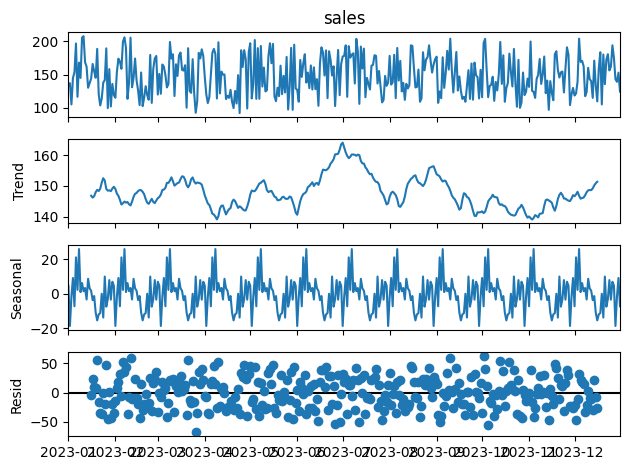

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate sample time-series data
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data = pd.DataFrame(date_rng, columns=['date'])
data['sales'] = np.random.randint(100, 200, size=(len(date_rng))) + \
                10 * np.sin(np.arange(len(date_rng)) * 2 * np.pi / 30)  # Adding seasonality
data.set_index('date', inplace=True)

# Resampling to monthly frequency
monthly_data = data.resample('M').sum()

# Rolling window statistics
data['sales_7day_ma'] = data['sales'].rolling(window=7).mean()

# Shifting for lag features
data['sales_prev_day'] = data['sales'].shift(1)

# Handling missing values
data['sales_interpolated'] = data['sales'].interpolate()

# Seasonality decomposition
decomposition = seasonal_decompose(data['sales'], model='additive', period=30)

print("Original Data:")
print(data.head())
print("\nMonthly Resampled Data:")
print(monthly_data.head())
print("\nData with Rolling Average and Lag:")
print(data[['sales', 'sales_7day_ma', 'sales_prev_day']].head())

# Plotting decomposition
decomposition.plot()
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

# Exploratory Data Analysis (EDA) for DataOps


## Statistical Summary techniques 

In [31]:
import pandas as pd
import numpy as np

def generate_summary_statistics(df):
    summary = df.describe()
    summary.loc['skewness'] = df.skew()
    summary.loc['kurtosis'] = df.kurt()
    
    print("Summary Statistics:")
    print(summary)

# Example usage
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
    'satisfaction': [3, 4, 4, 5, 5, 4, 3, 4, 5, 3]
})

generate_summary_statistics(data)

Summary Statistics:
                age         income  satisfaction
count     10.000000      10.000000     10.000000
mean      47.500000   95000.000000      4.000000
std       15.138252   30276.503541      0.816497
min       25.000000   50000.000000      3.000000
25%       36.250000   72500.000000      3.250000
50%       47.500000   95000.000000      4.000000
75%       58.750000  117500.000000      4.750000
max       70.000000  140000.000000      5.000000
skewness   0.000000       0.000000      0.000000
kurtosis  -1.200000      -1.200000     -1.392857


## Distribution Analysis

AttributeError: module 'seaborn' has no attribute 'qqplot'

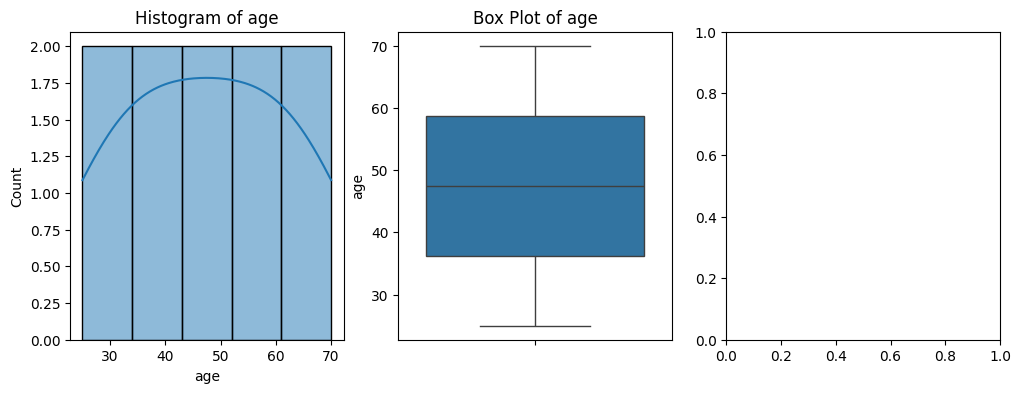

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_distributions(df):
    for col in df.columns:
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")
        
        plt.subplot(1, 3, 2)
        sns.boxplot(df[col])
        plt.title(f"Box Plot of {col}")
        
        plt.subplot(1, 3, 3)
        sns.qqplot(df[col], plot=plt)
        plt.title(f"Q-Q Plot of {col}")
        
        plt.tight_layout()
        plt.show()

# Example usage
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
    'satisfaction': [3, 4, 4, 5, 5, 4, 3, 4, 5, 3]
})

analyze_distributions(data)

## Correlation and relationship exploration

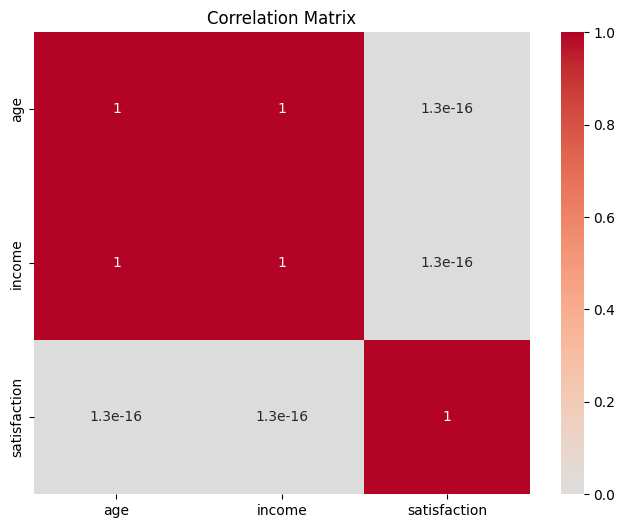

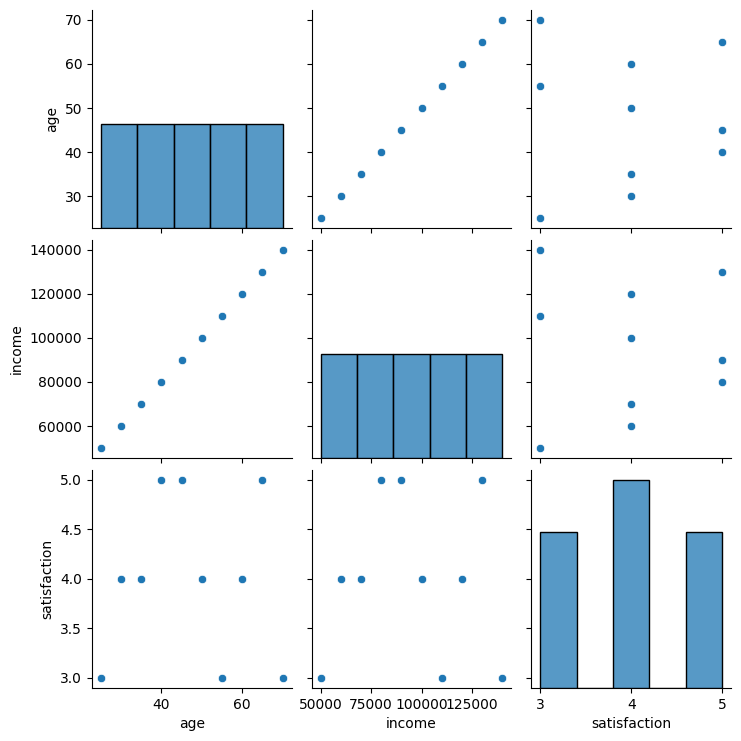

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def explore_correlations(df):
    corr_matrix = df.corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Matrix")
    plt.show()
    
    sns.pairplot(df)
    plt.show()

# Example usage
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000],
    'satisfaction': [3, 4, 4, 5, 5, 4, 3, 4, 5, 3]
})

explore_correlations(data)

## Outlier detection methods

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

def detect_outliers(df):
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers_z = df[(z_scores > 3).any(axis=1)]
    print("Outliers detected using Z-score method:")
    print(outliers_z)
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    print("\nOutliers detected using IQR method:")
    print(outliers_iqr)
    
    iso_forest = IsolationForest(contamination=0.1)
    outliers_if = df[iso_forest.fit_predict(df) == -1]
    print("\nOutliers detected using Isolation Forest:")
    print(outliers_if)

# Example usage
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'income': [50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 1000000],
    'satisfaction': [3, 4, 4, 5, 5, 4, 3, 4, 5, 3]
})

detect_outliers(data)

Outliers detected using Z-score method:
Empty DataFrame
Columns: [age, income, satisfaction]
Index: []

Outliers detected using IQR method:
   age   income  satisfaction
9   70  1000000             3

Outliers detected using Isolation Forest:
   age   income  satisfaction
9   70  1000000             3


# Data Visualization for Insights and Reporting

## Choosing Appropriate chart types

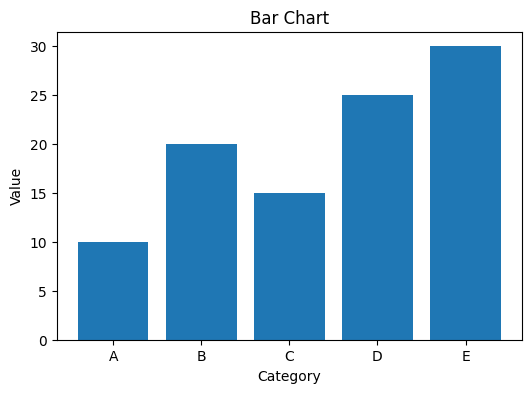

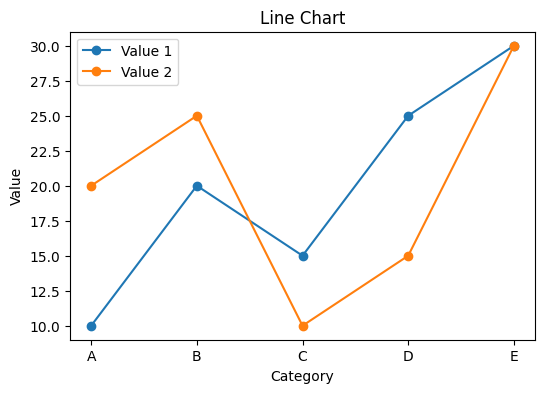

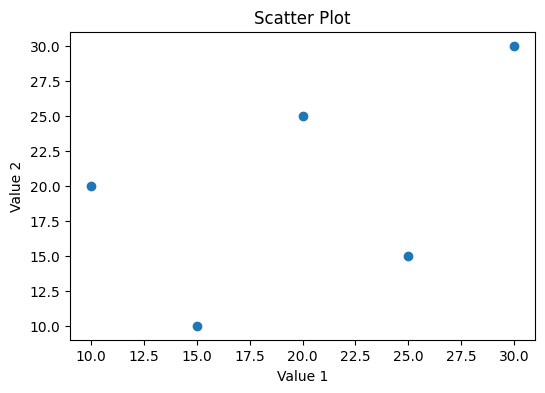

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D', 'E'],
    'value1': [10, 20, 15, 25, 30],
    'value2': [20, 25, 10, 15, 30]
})

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(data['category'], data['value1'])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart')
plt.show()

# Line chart
plt.figure(figsize=(6, 4))
plt.plot(data['category'], data['value1'], marker='o', label='Value 1')
plt.plot(data['category'], data['value2'], marker='o', label='Value 2')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Line Chart')
plt.legend()
plt.show()

# Scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(data['value1'], data['value2'])
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.title('Scatter Plot')
plt.show()

## Creating Interactive dashboards

In [ ]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Example data
data = pd.DataFrame({
    'date': pd.date_range(start='2022-01-01', end='2022-12-31', freq='D'),
    'category': np.random.choice(['A', 'B', 'C'], size=365),
    'value': np.random.randint(1, 100, size=365)
})

# Create the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1('Interactive Dashboard'),
    dcc.Dropdown(
        id='category-filter',
        options=[{'label': cat, 'value': cat} for cat in data['category'].unique()],
        value=None,
        placeholder='Select a category'
    ),
    dcc.Graph(id='value-chart')
])

# Define the callback to update the chart based on the selected category
@app.callback(
    Output('value-chart', 'figure'),
    Input('category-filter', 'value')
)
def update_chart(selected_category):
    filtered_data = data[data['category'] == selected_category] if selected_category else data
    return {
        'data': [{
            'x': filtered_data['date'],
            'y': filtered_data['value'],
            'type': 'scatter',
            'mode': 'lines',
        }],
        'layout': {
            'title': f"Value over Time for Category: {selected_category}" if selected_category else "Value over Time"
        }
    }

if __name__ == '__main__':
    app.run_server(debug=True)

/tmp/ipykernel_10661/2497637082.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_10661/2497637082.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


## Tools for Data visualisation in DataOps

In [33]:
import pandas as pd
import plotly.express as px

# Example data
data = pd.DataFrame({
    'category': ['A', 'B', 'C', 'D', 'E'] * 2,
    'value1': [10, 20, 15, 25, 30] * 2,
    'value2': [20, 25, 10, 15, 30] * 2,
    'date': pd.date_range(start='2022-01-01', periods=10, freq='D')
})

# Create the plot
fig = px.line(data, x='date', y=['value1', 'value2'], color_discrete_sequence=['blue', 'red'],
              title='Value over Time by Category', template='plotly_white',
              labels={'date': 'Date', 'value': 'Value'})

# Update the layout
fig.update_layout(
    title_font_size=24,
    legend_title_text='Category',
    legend=dict(x=0.02, y=0.98, font=dict(size=12)),
    hoverlabel=dict(font_size=16, font_family='Rockwell'),
    hovermode='x unified'
)

# Show the plot
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# SQL and Database Integration

## Integrating NoSQL databases in data pipeline
To run this MongoDB-related Python code, you'll need to follow these steps:

1. Install MongoDB:
    a. Download and install MongoDB on your system from the official MongoDB website.
    b. Make sure the MongoDB server is running on your local machine.


2. Install the PyMongo library:

    a. Open a terminal or command prompt.
    b. Run the following command to install PyMongo:
    c. Copypip install pymongo

3. Set up a MongoDB database:

    a. Create a database named "mydatabase" in your MongoDB instance.
    b. Create a collection named "customers" in the "mydatabase" database.


4. Ensure MongoDB is running:

    a. Make sure your MongoDB server is running on localhost:27017 (the default port).
    b. Once you've completed these steps, you can run the following code:

In [ ]:
import pymongo
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['mydatabase']
collection = db['customers']

# Insert a document
customer = {
    'name': 'John Doe',
    'email': 'john.doe@example.com',
    'orders': [
        {'item': 'Product A', 'quantity': 2, 'price': 50},
        {'item': 'Product B', 'quantity': 1, 'price': 100}
    ]
}
inserted_id = collection.insert_one(customer).inserted_id
print(f"Inserted document with ID: {inserted_id}")

# Query documents
query = {'name': 'John Doe'}
result = collection.find_one(query)
print(f"Found document: {result}")

# Update a document
update_query = {'_id': inserted_id}
update_data = {'$set': {'email': 'johndoe@example.com'}}
collection.update_one(update_query, update_data)
print("Updated document")

# Delete a document
delete_query = {'_id': inserted_id}
collection.delete_one(delete_query)
print("Deleted document")

# Close the connection
client.close()